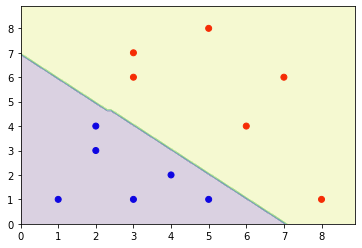

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the training data
x = np.array([[5, 8], [1, 1], [5, 1], [8, 1], [4, 2], [3, 6],
              [3, 7], [7, 6], [2, 4], [2, 3], [3, 1], [6, 4]])
y = np.array([[1], [0], [0], [1], [0], [1], [1], [1], [0], [0], [0], [1]])

# Augment the input data with a bias term
x = np.insert(x, 0, 1, axis=1)

# Initialize weights randomly
weights = np.random.randn(x.shape[1])

# Set the learning rate and number of epochs
learning_rate = 0.1
num_epochs = 100

# Train the perceptron
for epoch in range(num_epochs):
    errors = 0
    for input, target in zip(x, y):
        # Calculate the dot product of input and weights
        dot_product = np.dot(input, weights)

        # Predict the output
        if dot_product > 0:
            prediction = 1
        else:
            prediction = 0

        # Update the weights if the prediction is wrong
        if prediction != target:
            weights += learning_rate * (target - prediction) * input

            # Increment the number of errors
            errors += 1

    # Print the error rate for the current epoch
    # print("Epoch: {}, Error rate: {:.2f}".format(epoch, errors / len(x)))

# Plot the data points with different colors depending on the value of y
colors = ['red' if y_i == 1 else 'blue' for y_i in y]
plt.scatter(x[:, 1], x[:, 2], color=colors)

# Plot the decision boundary
x_min, x_max = x[:, 1].min() - 1, x[:, 1].max() + 1
y_min, y_max = x[:, 2].min() - 1, x[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)),
                  xx.ravel(),
                  yy.ravel()], weights)
Z = np.where(Z > 0, 1, 0)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)

# Show the plot
plt.show()
